# Deep Link Prediction

![image.png](./media/linkprediction1.png)

![image.png](./media/linkprediction2.png)

![image.png](./media/linkprediction3.png)

![image.png](./media/linkprediction4.png)

![image.png](./media/linkprediction5.png)

![image.png](./media/linkprediction6.png)

![image.png](./media/linkprediction7.png)

![image.png](./media/linkprediction8.png)

![image.png](./media/linkprediction9.png)

![image.png](./media/linkprediction10.png)

![image.png](./media/linkprediction11.png)

![image.png](./media/linkprediction12.png)

![image.png](./media/linkprediction13.png)

![image.png](./media/linkprediction14.png)

![image.png](./media/linkprediction15.png)

![image.png](./media/linkprediction16.png)

![image.png](./media/linkprediction17.png)

![image.png](./media/linkprediction18.png)

![image.png](./media/linkprediction19.png)

![image.png](./media/linkprediction20.png)

![image.png](./media/linkprediction21.png)

![image.png](./media/linkprediction22.png)

![image.png](./media/linkprediction24.png)

![image.png](./media/linkprediction26.png)

![image.png](./media/linkprediction27.png)

![image.png](./media/linkprediction28.png)

![image.png](./media/linkprediction29.png)

![image.png](./media/linkprediction30.png)

In [296]:
import csv 
import json
import string
import random
import typing
import hashlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
np.random.seed(5)

In [3]:
def random_string(size: int = 10) -> str:
    """
    Generates a random string.
    """
    chars: str = string.ascii_lowercase + "aeiou" * 30 + "rtsmpcnlgr" * 15
    return "".join([
        random.choice(chars)
        for _ in range(size)
    ])

assert isinstance(random_string(), str)
assert random_string() != random_string()
assert len(random_string(10)) == 10
assert len(random_string(20)) == 20

In [4]:
def random_integer(low: int = 0, high: int = 100) -> int:
    """
    Generates a random integer.
    """
    return random.randint(low, high)

assert isinstance(random_integer(), int)
assert random_integer() >= 0
assert random_integer() <= 100
assert random_integer(low=120, high=140) >= 120
assert random_integer(low=120, high=140) <= 140

In [5]:
def random_float(low: int = 0, high: int = 100) -> float:
    """
    Generates a random float number.
    """
    return random.uniform(low, high)

assert isinstance(random_float(), float)
assert random_float() >= 0
assert random_float() <= 100
assert random_float(low=120, high=140) <= 140
assert random_float(low=120, high=140) >= 120

In [6]:
def random_option(options: list) -> str:
    """
    Selects a value from a list randomly.
    """
    return random.choice(list(set(options)))

assert random_option([1, 2, 3]) in [1, 2, 3]

In [7]:
def random_probability() -> float:
    """
    Generates a random probability float number.
    """
    return random.uniform(0, 1)

assert isinstance(random_probability(), float)
assert random_probability() >= 0
assert random_probability() <= 1

In [8]:
def random_event(probability: float = 0.5) -> bool:
    """
    Generates a determines the occurrence of a random event.
    """
    assert probability >= 0
    assert probability <= 1
    return random_probability() < probability

assert isinstance(random_event(), bool)
assert random_event(probability=1) is True
assert random_event(probability=0) is False

In [9]:
def random_city() -> str:
    """
    Generates a random city name.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_city(), str)
assert random_city() != random_city()

In [10]:
def random_country() -> str:
    """
    Generates a random country.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_country(), str)
assert random_country() != random_country()

In [11]:
def random_industry() -> str:
    """
    Generates a random industry.
    """
    return random_string(10)

assert isinstance(random_industry(), str)
assert random_industry() != random_industry()

In [12]:
def random_state() -> str:
    """
    Generates a random state.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_state(), str)
assert random_state() != random_state()

In [13]:
def add_suffix(record: dict, suffix: str) -> dict:
    """
    Appends a suffix to all the keys of a given dictionary.
    """
    return {f"{k}#{suffix}": v for k, v in record.items()}

assert add_suffix({"a": "b"}, "1") == {"a#1": "b"}
assert add_suffix({"a": "b"}, "2") == {"a#2": "b"}

In [134]:
def word2vec(text: typing.Optional[str]) -> np.ndarray:
    """
    Transforms a string into a numpy array of a fixed size.
    """
    if not isinstance(text, str) or text == "":
        return np.zeros(64)
    return np.array([
        ord(character)
        for character in hashlib.sha256(text.encode()).hexdigest()
    ])

assert isinstance(word2vec("lorem"), np.ndarray)
assert np.array_equal(word2vec("lorem"), word2vec("lorem"))
assert word2vec("lorem").shape == (64, )
assert word2vec(random_string(1)).shape == (64, )
assert word2vec(random_string(10)).shape == (64, )
assert word2vec(random_string(100)).shape == (64, )
assert word2vec(random_string(500)).shape == (64, )
assert isinstance(word2vec(""), np.ndarray)
assert np.array_equal(word2vec(""), word2vec(""))
assert word2vec("").shape == (64, )

In [396]:
def random_company(nulls: float = 0.1) -> dict:
    """
    Generates a random Company.
    """
    return {
        'city': '' if random_event(probability=nulls) else random_city(),
        'state': '' if random_event(probability=nulls) else random_state(),
        'country': '' if random_event(probability=nulls) else random_country(),
        'industry': '' if random_event(probability=nulls) else random_industry(),
        'employee_count': None if random_event(probability=nulls) else random_integer(1, 3000),
        'affiliations': random_integer(1, 5000),
        'popularity_score': random_probability(),
        'total_investments': None if random_event(probability=nulls) else random_integer(0, 4),
        'valuation': None if random_event(probability=nulls) else random_integer(50000, 500000),
        'average_investment_size': None if random_event(probability=nulls) else random_integer(10000, 100000),
    }


assert isinstance(random_company(), dict)
assert random_company() != random_company()

In [397]:
def random_person(nulls: float = 0.1) -> dict:
    """
    Generates a random Person.
    """
    return {
        'city': '' if random_event(probability=nulls) else random_city(),
        'state': '' if random_event(probability=nulls) else random_state(),
        'country': '' if random_event(probability=nulls) else random_country(),
        'industry': '' if random_event(probability=nulls) else random_industry(),
        'affiliations': random_integer(1, 3000),
        'popularity_score': random_probability(),
        'total_investments': None if random_event(probability=nulls) else random_integer(0, 4),
        'average_investment_size': None if random_event(probability=nulls) else random_integer(10000, 100000),
    }


assert isinstance(random_person(), dict)
assert random_person() != random_person()

In [473]:
def random_relationship(nulls: float = 0.1) -> dict:
    """
    Generates a random Affiliation.
    """
    return {
        'introduction_path_length': random_integer(4, 8),
        'introduction_path_score': random_float(0, 2),
        'mutual_connections': random_integer(0, 10),
    }


assert isinstance(random_relationship(), dict)
assert random_relationship() != random_relationship()

In [474]:
def random_person_company_link(
    nulls: float = 0.1,
    connected: bool = False,
    target: str = 'connected',
    connectedness: float = 0.5,
    similarity: float = 0.5,
    closeness: float = 0.5,
    capitalization: float = 0.5,
    popularity: float = 0.5,
) -> dict:
    """
    Generates a random dictionary representation of the affiliation
    of a Person and a Company.
    """
    company: dict = random_company(nulls=nulls)
    person: dict = random_person(nulls=nulls)
    relationship: dict = random_relationship(nulls=nulls)
    if connected:
        # Closeness
        if random_event(probability=closeness):
            person['country'] = company['country']
        if random_event(probability=closeness):
            person['state'] = company['state']
            person['country'] = company['country']
        if random_event(probability=closeness):
            person['state'] = company['state']
            person['country'] = company['country']
            person['city'] = company['city']

        # Similarity
        if random_event(probability=similarity):
            person['industry'] = company['industry']
        
        # Capitalization
        if random_event(probability=capitalization):
            company['employee_count'] = random_integer(3000, 10000)
        if random_event(probability=capitalization):
            company['valuation'] = random_integer(1000000, 1000000000)
        if random_event(probability=capitalization):
            company['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=capitalization):
            person['average_investment_size'] = random_integer(100000, 1000000)
        
        # Popularity
        if random_event(probability=popularity):
            company['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=popularity):
            person['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=popularity):
            person['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=popularity):
            company['popularity_score'] = random_float(0.9, 1.0)
        
        # Connectedness.
        if random_event(probability=connectedness):
            relationship['introduction_path_length'] = random_integer(1, 2)
        if random_event(probability=connectedness):
            relationship['introduction_path_score'] = random_float(0.94, 1.0)
        if random_event(probability=connectedness):
            relationship['mutual_connections'] = random_integer(300, 10000)

    else:
        relationship['introduction_path_length'] = random_integer(4, 6)
        relationship['introduction_path_score'] = random_float(0.0, 0.2)
        relationship['mutual_connections'] = random_integer(0, 10)
    return {
        **add_suffix(person, "person"),
        **add_suffix(company, "company"),
        **add_suffix(relationship, "relationship"),
        target: 1 if connected else 0,
    }   


assert isinstance(random_person_company_link(), dict)
assert isinstance(random_person_company_link(connected=True), dict)
assert isinstance(random_person_company_link(connected=False), dict)
assert random_person_company_link() != random_person_company_link()
assert len(random_person_company_link()) == sum([
    1,
    len(random_relationship()),
    len(random_company()),
    len(random_person()),
])

In [475]:
def random_person_person_link(
    nulls: float = 0.1,
    connected: bool = False,
    target: str = 'connected',
    connectedness: float = 0.5,
    similarity: float = 0.5,
    closeness: float = 0.5,
    capitalization: float = 0.5,
    popularity: float = 0.5,
) -> dict:
    """
    Generates a random dictionary representation of the affiliation
    of a Person and a Company.
    """
    other: dict = random_person(nulls=nulls)
    person: dict = random_person(nulls=nulls)
    relationship: dict = random_relationship(nulls=nulls)
    if connected:
        # Closeness
        if random_event(probability=closeness):
            person['country'] = other['country']
        if random_event(probability=closeness):
            person['state'] = other['state']
            person['country'] = other['country']
        if random_event(probability=closeness):
            person['state'] = other['state']
            person['country'] = other['country']
            person['city'] = other['city']
        
        # Similarity
        if random_event(probability=similarity):
            person['industry'] = other['industry']
    
        # Capitalization
        if random_event(probability=capitalization):
            other['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=capitalization):
            person['average_investment_size'] = random_integer(100000, 1000000)
        
        # Popularity
        if random_event(probability=popularity):
            other['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=popularity):
            person['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=popularity):
            person['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=popularity):
            other['popularity_score'] = random_float(0.9, 1.0)

        # Connectedness.
        if random_event(probability=connectedness):
            relationship['introduction_path_length'] = random_integer(1, 2)
        if random_event(probability=connectedness):
            relationship['introduction_path_score'] = random_float(0.94, 1.0)
        if random_event(probability=connectedness):
            relationship['mutual_connections'] = random_integer(300, 10000)
    else:
        relationship['introduction_path_length'] = random_integer(4, 6)
        relationship['introduction_path_score'] = random_float(0.0, 0.2)
        relationship['mutual_connections'] = random_integer(0, 10)
    return {
        **add_suffix(person, "1"),
        **add_suffix(other, "2"),
        **add_suffix(relationship, "relationship"),
        target: 1 if connected else 0,
    }   


assert isinstance(random_person_person_link(), dict)
assert isinstance(random_person_person_link(connected=True), dict)
assert isinstance(random_person_person_link(connected=False), dict)
assert len(random_person_person_link()) == sum([
    1,
    len(random_relationship()),
    len(random_person()),
    len(random_person()),
])

Links: (1, 22)
Links: (1, 22)
Links: (1, 22)
Links: (1, 22)
Links: (2, 22)


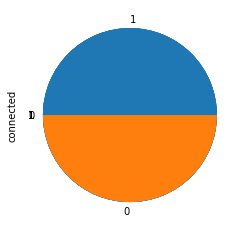

In [476]:
def generate_random_investments_dataset(
    total: int = 1000,
    target: str = 'connected',
    connections: float = 0.5,
    nulls: float = 0.01,
    feedback: list = None,
    relevance: int = 10,
    connectedness: float = 0.5,
    similarity: float = 0.5,
    closeness: float = 0.5,
    capitalization: float = 0.5,
    popularity: float = 0.5,
) -> pd.DataFrame:
    """
    Generates a random dataset of $total relationships between Persons and Companies.
    """
    raw_links_list: typing.List[dict] = [
        random_person_company_link(
            nulls=nulls,
            connected=random_event(probability=connections),
            target=target,
            similarity=similarity,
            connectedness=connectedness,
            capitalization=capitalization,
            popularity=popularity,
            closeness=closeness,
        )
        for _ in range(total)
    ]
    columns: pd.Index = raw_links_list[0].keys()
    if feedback is not None:
        for case in feedback:
            for _ in range(relevance):
                raw_links_list.append({
                    k: v
                    for k, v in case.items()
                    if k in columns
                })
    raw_links_dataframe: pd.DataFrame = pd.DataFrame(raw_links_list)
    raw_links_dataframe[target] = raw_links_dataframe[target].astype(int)
    print("Links:", raw_links_dataframe.shape)
    raw_links_dataframe[target].astype(int).value_counts().plot(kind='pie')
    return raw_links_dataframe

assert isinstance(generate_random_investments_dataset(total=1), pd.DataFrame)
assert not generate_random_investments_dataset(total=1).equals(generate_random_investments_dataset(total=1))
assert generate_random_investments_dataset(total=1).shape == (1, len(random_person_company_link()))
assert generate_random_investments_dataset(total=2).shape == (2, len(random_person_company_link()))

Links: (1, 20)
Links: (1, 20)
Links: (1, 20)
Links: (1, 20)
Links: (2, 20)


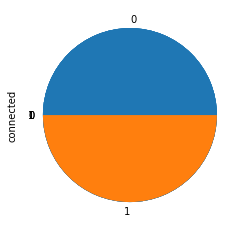

In [370]:
def generate_random_contacts_dataset(
    total: int = 1000,
    target: str = 'connected',
    connections: float = 0.5,
    nulls: float = 0.01,
    feedback: list = None,
    relevance: int = 10,
    connectedness: float = 0.5,
    similarity: float = 0.5,
    closeness: float = 0.5,
    capitalization: float = 0.5,
    popularity: float = 0.5,
) -> pd.DataFrame:
    """
    Generates a random dataset of $total relationships between Persons.
    """
    raw_links_list: typing.List[dict] = [
        random_person_person_link(
            nulls=nulls,
            connected=random_event(probability=connections),
            target=target,
            similarity=similarity,
            connectedness=connectedness,
            capitalization=capitalization,
            popularity=popularity,
            closeness=closeness,
        )
        for _ in range(total)
    ]
    columns: pd.Index = raw_links_list[0].keys()
    if feedback is not None:
        for case in feedback:
            for _ in range(relevance):
                raw_links_list.append({
                    k: v
                    for k, v in case.items()
                    if k in columns
                })
    raw_links_dataframe: pd.DataFrame = pd.DataFrame(raw_links_list)
    raw_links_dataframe[target] = raw_links_dataframe[target].astype(int)
    print("Links:", raw_links_dataframe.shape)
    raw_links_dataframe[target].astype(int).value_counts().plot(kind='pie')
    return raw_links_dataframe

assert isinstance(generate_random_contacts_dataset(total=1), pd.DataFrame)
assert not generate_random_contacts_dataset(total=1).equals(generate_random_contacts_dataset(total=1))
assert generate_random_contacts_dataset(total=1).shape == (1, len(random_person_person_link()))
assert generate_random_contacts_dataset(total=2).shape == (2, len(random_person_person_link()))

In [338]:
def fix_nulls(df: pd.DataFrame) -> pd.DataFrame:
    """
    Fixes the null values of a given DataFrame.
    """
    columns: pd.Index = df.select_dtypes(include=['number']).columns
    df[columns] = df[columns].fillna(0)
    columns: pd.Index = df.select_dtypes(include=['object']).columns
    df[columns] = df[columns].fillna('')
    return df

df: pd.DataFrame = pd.DataFrame({"a": [0, None, 2], "b": ["b", None, "b"], "c": [0.0, None, 1.0]})
df[df.isna()].count()['a'] == 1
df[df.isna()].count()['b'] == 1
df[df.isna()].count()['c'] == 1
df: pd.DataFrame = fix_nulls(df)
df[df.isna()].count()['a'] == 0
df[df.isna()].count()['b'] == 0
df[df.isna()].count()['c'] == 0

True

In [339]:
def df2vec(df: pd.DataFrame, target: str = 'connected') -> pd.DataFrame:
    """
    Transforms a string into a numpy array of a fixed size.
    """
    numeric: pd.Index = df.select_dtypes(include=['number']).columns
    vectorized_dataset: pd.DataFrame = df.copy()  
    for feature in vectorized_dataset.columns:
        if feature != target and feature not in numeric:
            print("Vectorizing:", feature)
            vectorized_dataset[feature] = vectorized_dataset[feature].apply(word2vec).apply(np.array)
    return vectorized_dataset

assert isinstance(df2vec(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
)['a'][0], np.ndarray)
assert isinstance(df2vec(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
)['a'][1], np.ndarray)
assert df2vec(
    pd.DataFrame({"a": ["b", "c"], "t": [0, 1]}), target="t",
).shape == (2, 2)
assert df2vec(
    pd.DataFrame({"a": [2, 1], "t": [0, 1]}), target="t",
).shape == (2, 2)

Vectorizing: a
Vectorizing: a
Vectorizing: a


In [340]:
def vec2matrix(data: pd.DataFrame) -> np.ndarray:
    """
    Transforms a Pandas DataFrame into a Numpy 3D Array.
    """
    features: typing.List[np.ndarray] = []
    for feature in data.columns:
        features.append(np.array(data[feature].to_list()))
    matrix: np.array = np.array(features)
    matrix: np.array = np.swapaxes(matrix, 0, 1)
    return matrix

array: np.ndarray = np.zeros((3, ))
dataframe: pd.DataFrame = pd.DataFrame({"a": [array, array]})
assert vec2matrix(dataframe).shape == (2, 1, 3)

In [341]:
def get_numerical(df: pd.DataFrame, target: str = 'connected') -> pd.DataFrame:
    """
    Extracts numerical features from a DataFrame.
    """
    numerical: pd.Index = [
        column
        for column in df.select_dtypes(include=['number']).columns
        if column != target
    ]
    print("Numerical Features:", numerical)
    return df[numerical]

df: pd.DataFrame = pd.DataFrame({"a": [1, 2, 3], "b": ["c", "d", "e"]})
df: pd.DataFrame = get_numerical(df)
assert df['a'].all()

Numerical Features: ['a']


In [342]:
def get_categorical(df: pd.DataFrame, target: str = 'connected') -> pd.DataFrame:
    """
    Extracts categorical features from a DataFrame.
    """
    numerical: pd.Index = [
        column
        for column in df.select_dtypes(include=['number']).columns
        if column != target
    ]
    categorical: pd.Index = [
        column
        for column in df.columns
        if column not in numerical
        and column != target
    ]
    print("Categorical Features:", categorical)
    return df[categorical]

df: pd.DataFrame = pd.DataFrame({"a": [1, 2, 3], "b": ["c", "d", "e"]})
df: pd.DataFrame = get_categorical(df)
assert df['b'].all()

Categorical Features: ['b']


In [343]:
def normalize(
    df: pd.DataFrame,
    parameters: dict = None,
    target: str = 'connected',
) -> typing.Tuple:
    """
    Normalizes a DataFrame
    """
    if parameters is None:
        numerical: pd.Index = [
            column
            for column in df.select_dtypes(include=['number']).columns
            if column != target
            and not column.startswith('popularity_score')
            and column != 'introduction_path_score#relationship'
        ]
        parameters: dict = {}
        for column in numerical:
            mean: float = df[column].mean()
            std: float = df[column].std()
            print("Normalizing:", column, "Mean:", mean, "Std:", std)
            parameters[column] = {"mean": mean, "std": std}
    for column in parameters:
        df[column] = (df[column] - parameters[column]['mean']) / parameters[column]['std']
    return df, parameters

df: pd.DataFrame = pd.DataFrame({
    "a": [1, 2, 3],
    "b": ["c", "d", "e"],
    "t": [1, 2, 3],
})
df, parameters = normalize(df, target='t')
assert df.iloc[0]['a'] == -1
assert df.iloc[1]['a'] == 0
assert df.iloc[2]['a'] == 1
assert df.iloc[0]['b'] == "c"
assert df.iloc[1]['b'] == "d"
assert df.iloc[2]['b'] == "e"
assert df.iloc[0]['t'] == 1
assert df.iloc[1]['t'] == 2
assert df.iloc[2]['t'] == 3
assert parameters == {'a': {'mean': 2.0, 'std': 1.0}}
df: pd.DataFrame = pd.DataFrame({
    "a": [1, 2, 3],
    "b": ["c", "d", "e"],
    "t": [1, 2, 3],
})
df, parameters = normalize(df, target='t', parameters={'a': {'mean': 200.0, 'std': 100.0}})
assert parameters == {'a': {'mean': 200.0, 'std': 100.0}}
assert df.iloc[0]['a'] == -1.99
assert df.iloc[1]['a'] == -1.98
assert df.iloc[2]['a'] == -1.97
assert df.iloc[0]['b'] == "c"
assert df.iloc[1]['b'] == "d"
assert df.iloc[2]['b'] == "e"
assert df.iloc[0]['t'] == 1
assert df.iloc[1]['t'] == 2
assert df.iloc[2]['t'] == 3

Normalizing: a Mean: 2.0 Std: 1.0


Numerical Features: ['n']
Categorical Features: ['c']
Predicted: m
Xn (20, 1)
Xc (20, 1)
Y (20,)
Train (12, 1) (12, 1) (12,)
Test (4, 1) (4, 1) (4,)
Val (4, 1) (4, 1) (4,)
Train (12, 1) (12, 1, 3) (12,)
Test (4, 1) (4, 1, 3) (4,)
Val (4, 1) (4, 1, 3) (4,)
Links: [6, 2, 2] [12, 4, 4]


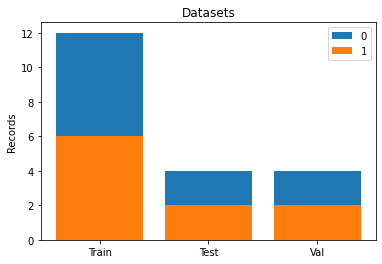

In [344]:
def split_dataframe(
    dataset: pd.DataFrame,
    target: str = 'connected',
    test_size: float = 0.2,
    val_size: float = 0.2,
    random_state: int = 5,
) -> typing.Tuple[np.ndarray]:
    """
    Splits a dataset into Train, Test and Validation.
    """
    xn: pd.DataFrame = get_numerical(dataset, target=target)
    xc: pd.DataFrame = get_categorical(dataset, target=target)
    y: pd.DataFrame = dataset[target]
    assert xn.shape[0] == y.shape[0]
    assert xc.shape[0] == y.shape[0]
    print("Predicted:", target)

    print("Xn", xn.shape)
    print("Xc", xc.shape)
    print("Y", y.shape)

    xn_train, xn_test, xc_train, xc_test, y_train, y_test = train_test_split(
        xn,
        xc,
        y,
        test_size=test_size,
        random_state=random_state,
        shuffle=True,
        stratify=y,
    )

    xn_train, xn_val, xc_train, xc_val, y_train, y_val = train_test_split(
        xn_train,
        xc_train,
        y_train,
        test_size=test_size,
        random_state=random_state,
        shuffle=True,
        stratify=y_train,
    )

    print("Train", xn_train.shape, xc_train.shape, y_train.shape)
    print("Test", xn_test.shape, xc_test.shape, y_test.shape)
    print("Val", xn_val.shape, xc_val.shape, y_val.shape)

    assert xn_train.shape[0] == y_train.shape[0]
    assert xn_test.shape[0] == y_test.shape[0]
    assert xn_val.shape[0] == y_val.shape[0]

    assert xc_train.shape[0] == y_train.shape[0]
    assert xc_test.shape[0] == y_test.shape[0]
    assert xc_val.shape[0] == y_val.shape[0]

    assert xn_train.shape[1] == xn_test.shape[1]
    assert xn_train.shape[1] == xn_val.shape[1]
    assert xn_test.shape[1] == xn_val.shape[1]

    assert xc_train.shape[1] == xc_test.shape[1]
    assert xc_train.shape[1] == xc_val.shape[1]
    assert xc_test.shape[1] == xc_val.shape[1]
    assert xn_train.shape[0] + xn_test.shape[0] + xn_val.shape[0] == xn.shape[0]
    assert xc_train.shape[0] + xc_test.shape[0] + xc_val.shape[0] == xc.shape[0]
    assert y_train.shape[0] + y_test.shape[0] + y_val.shape[0] == y.shape[0]

    xn_train: np.ndarray = xn_train.values
    xn_test: np.ndarray = xn_test.values
    xn_val: np.ndarray = xn_val.values

    y_train: np.ndarray = y_train.values
    y_test: np.ndarray = y_test.values
    y_val: np.ndarray = y_val.values

    xc_train: typing.List[np.array] = vec2matrix(xc_train)
    xc_test: typing.List[np.array] = vec2matrix(xc_test)
    xc_val: typing.List[np.array] = vec2matrix(xc_val)

    print("Train", xn_train.shape, xc_train.shape, y_train.shape)
    print("Test", xn_test.shape, xc_test.shape, y_test.shape)
    print("Val", xn_val.shape, xc_val.shape, y_val.shape)

    matches: list = [
        sum(y_train == 1),
        sum(y_test == 1),
        sum(y_val == 1),   
    ]
    missmatches: list = [
        y_train.shape[0],
        y_test.shape[0],
        y_val.shape[0],   
    ]
    print("Links:", matches, missmatches)
    assert matches != missmatches, "Too many links!"
    assert all(matches), "Not enough links!"
    assert all(missmatches), "Not enough missing links!"
    labels: list = ['Train', 'Test', 'Val']
    fig, ax = plt.subplots()
    ax.bar(labels, missmatches, label='0')
    ax.bar(labels, matches, label='1')
    ax.set_ylabel('Records')
    ax.set_title('Datasets')
    ax.legend()
    plt.show()

    return xn_train, xc_train, y_train, xn_test, xc_test, y_test, xn_val, xc_val, y_val
    
xn_train, xc_train, y_train, xn_test, xc_test, y_test, xn_val, xc_val, y_val = split_dataframe(
    dataset=pd.DataFrame({
        "c": [np.array([1, 2, 3])] * 20,
        "n": [1] * 20,
        "m": [1, 0] * 10
    }),
    target='m',
    test_size=0.2,
    val_size=0.2,
)
assert xn_train.shape == (12, 1)
assert xc_train.shape == (12, 1, 3)
assert y_train.shape == (12, )
assert xn_test.shape == (4, 1)
assert xc_test.shape == (4, 1, 3)
assert y_test.shape == (4, )
assert xn_val.shape == (4, 1)
assert xc_val.shape == (4, 1, 3)
assert y_val.shape == (4, )
assert isinstance(xc_train, np.ndarray)
assert isinstance(xn_train, np.ndarray)
assert isinstance(y_train, np.ndarray)
assert isinstance(xc_test, np.ndarray)
assert isinstance(xn_test, np.ndarray)
assert isinstance(y_test, np.ndarray)
assert isinstance(xc_val, np.ndarray)
assert isinstance(xn_val, np.ndarray)
assert isinstance(y_val, np.ndarray)

Input: (3, 4) (3, 2, 2)
Model: "model_80"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_173 (InputLayer)          [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_401 (Dense)               (None, 4096)         20480       input_173[0][0]                  
__________________________________________________________________________________________________
dropout_277 (Dropout)           (None, 4096)         0           dense_401[0][0]                  
__________________________________________________________________________________________________
input_174 (InputLayer)          [(None, 2, 2)]       0                                            
___________________________________________________________________

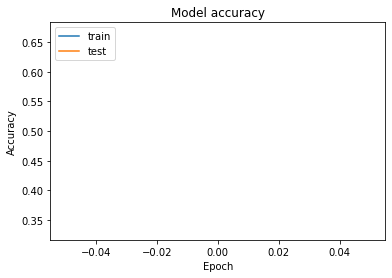

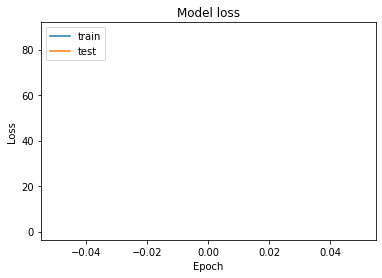

1/1 [==============================] - 0s 46ms/step - loss: 87.5949 - binary_accuracy: 0.6667
Metrics: 87.59487915039062 0.6666666865348816


In [510]:
def train_link_prediction(
    xn_train: np.ndarray,
    xc_train: np.ndarray,
    y_train: np.ndarray,
    xn_test: np.ndarray,
    xc_test: np.ndarray,
    y_test: np.ndarray,
    xn_val: np.ndarray,
    xc_val: np.ndarray,
    y_val: np.ndarray,
    learning_rate: float = 0.0001,
    batch_size: int = 30,
    epochs: int = 1,
    dropout: float = 0.01,
    patience: int = 3,
    momentum: float = 0.0,
    positive_bias: float = 1.0,
    negative_bias: float = 1.0,
    rho: float = 0.1,
) -> typing.Tuple[keras.models.Model, float, float]:
    """
    Trains a classifier to predict links.
    """
    print("Input:", xn_train.shape, xc_train.shape)

    numerical_input_layer: keras.layers.Input = keras.layers.Input(shape=(xn_train.shape[1], ))
    
    dense1: keras.layers.Dense = keras.layers.Dense(4096, activation='relu')(numerical_input_layer)
    dropout1: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense1)

    dense2: keras.layers.Dense = keras.layers.Dense(2048, activation='relu')(dropout1)
    dropout2: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense2)
        
    dense3: keras.layers.Dense = keras.layers.Dense(1024, activation='relu')(dropout2)
    dropout3: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense3)

    categorical_input_layer: keras.layers.Input = keras.layers.Input(shape=(xc_train.shape[1], xc_train.shape[2]))
    flatten: keras.layers.Flatten = keras.layers.Flatten()(categorical_input_layer)
    categorical_dense: keras.layers.Dense = keras.layers.Dense(12, activation='relu')(flatten)
    categorical_dropout: keras.layers.Dropout = keras.layers.Dropout(dropout)(categorical_dense)

    merge_layer: keras.layers.Concatenate = keras.layers.Concatenate()([dense3, categorical_dropout])

    dense4: keras.layers.Dense = keras.layers.Dense(514, activation='relu')(merge_layer)
    dropout4: keras.layers.Dropout = keras.layers.Dropout(dropout)(dense4)

    out: keras.layers.Dense = keras.layers.Dense(1, activation='sigmoid')(dense4)

    model: keras.Model = keras.Model(inputs=[numerical_input_layer, categorical_input_layer], outputs=out)

    model.compile(
        # optimizer=keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True),
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate, momentum=momentum, rho=rho),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.BinaryAccuracy()
        ],
    )

    print(model.summary())

    history: keras.callbacks.History = model.fit(
        [xn_train, xc_train],
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        class_weight={0: positive_bias, 1: negative_bias},
        validation_data=([xn_test, xc_test], y_test),
        callbacks=[
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience),
        ]
    )

    print(history.history)

    # Summarize history of accuracy.
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss.
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    loss, accuracy = model.evaluate([xn_val, xc_val], y_val, batch_size=128)
    print("Metrics:", loss, accuracy)

    return model, loss, accuracy


xc: np.array = np.array([[[0, 1], [0, 1]], [[0, 1], [0, 1]], [[0, 1], [0, 1]]])
xn: np.array = np.array([[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]])
y: np.array = np.array([0, 1, 1])
sample_model, sample_loss, sample_accuracy = train_link_prediction(
    xn_train=xn,
    xc_train=xc,
    y_train=y,
    xn_test=xn,
    xc_test=xc,
    y_test=y,
    xn_val=xn,
    xc_val=xc,
    y_val=y,
    epochs=1,
    learning_rate=0.01,
    batch_size=50,
    patience=0,
)
assert isinstance(sample_model, keras.models.Model)
assert isinstance(sample_loss, float)
assert isinstance(sample_accuracy, float)

/usr/local/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



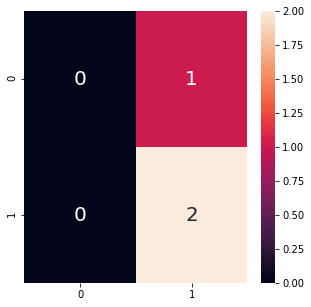

In [459]:
def error_analysis(
    model: keras.models.Model,
    xn_test: np.array,
    xc_test: np.array,
    y_test: np.array,
    confidence: float
) -> None:
    """
    Performs error analysis on a prediction model.
    """
    y_pred: np.ndarray = np.array(model.predict((xn_test, xc_test)))
    matrix = confusion_matrix(y_test > confidence, y_pred > confidence)
    print(classification_report(y_test > confidence, y_pred > confidence))
    cm: np.array = confusion_matrix(y_test > confidence, y_pred > confidence)
    cm: pd.DataFrame = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize = (5, 5))
    sns.heatmap(cm, annot=True, annot_kws={"size": 20})
    plt.show()

xc: np.array = np.array([[[0, 1], [0, 1]], [[0, 1], [0, 1]], [[0, 1], [0, 1]]])
xn: np.array = np.array([[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]])
y: np.array = np.array([0, 1, 1])
error_analysis(
    model=sample_model,
    confidence=0.3,
    xn_test=xn,
    xc_test=xc,
    y_test=y,
)

In [460]:
 def predict_link_model(
    model: keras.models.Model,
    records: typing.Union[np.ndarray, list],
    confidence: typing.Optional = None,
    normalization: dict = None,
 ) -> np.ndarray:
    """
    Uses a trained model to predict links.
    """
    if isinstance(records, list):
        df: pd.DataFrame = pd.DataFrame(data=records, columns=records[0].keys())
        df: pd.DataFrame = fix_nulls(df)
        df, _ = normalize(df, parameters=normalization)
        df: pd.DataFrame = df2vec(df)
        xn_pred: np.array = get_numerical(df).values
        xc_pred: np.array = vec2matrix(get_categorical(df))
        records: list = [xn_pred, xc_pred]
    assert len(records) == 2
    print("Input:", records[0].shape, records[1].shape)
    y_pred: list = model.predict(records)
    print("Predictions:", y_pred)
    if confidence is not None:
        y_pred = y_pred >= confidence
        print("Confidence:", y_pred)
    return y_pred

assert predict_link_model(model=sample_model, records=(np.zeros((1, 4)), np.zeros((1, 2, 2)))).shape == (1, 1)
assert predict_link_model(model=sample_model, records=(np.zeros((2, 4)), np.zeros((2, 2, 2)))).shape == (2, 1)
assert predict_link_model(model=sample_model, records=(np.zeros((3, 4)), np.zeros((3, 2, 2)))).shape == (3, 1)
assert predict_link_model(model=sample_model, records=(np.zeros((1, 4)), np.zeros((1, 2, 2))), confidence=0)[0][0]

Input: (1, 4) (1, 2, 2)
Predictions: [[0.49209496]]
Input: (2, 4) (2, 2, 2)
Predictions: [[0.49209496]
 [0.49209496]]
Input: (3, 4) (3, 2, 2)
Predictions: [[0.49209496]
 [0.49209496]
 [0.49209496]]
Input: (1, 4) (1, 2, 2)
Predictions: [[0.49209496]]
Confidence: [[ True]]


# Investment Prediction

Links: (1020, 22)


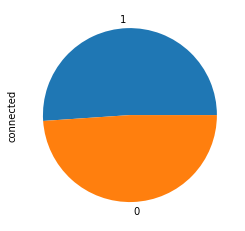

In [536]:
raw_investments_dataframe: pd.DataFrame = generate_random_investments_dataset(
    total=1000,
    connections=0.5,
    nulls=0.01,
    relevance=10,
    connectedness=0.5,
    similarity=0.5,
    closeness=0.5,
    capitalization=0.5,
    popularity=0.5,
    feedback=[
        {
            'city#company': 'San Francisco',
            'state#company': 'California',
            'country#company': 'US',
            'industry#company': 'health',
            'employee_count#company': 100,
            'affiliations#company': 3000,
            'popularity_score#company': 0.9,
            'total_investments#company': 12,
            'valuation#company': 10000000,
            'average_investment_size#company': 10000,
            'city#person': 'San Francisco',
            'state#person': 'California',
            'country#person': 'US',
            'industry#person': 'health',
            'affiliations#person': 1000,
            'popularity_score#person': 0.4,
            'total_investments#person': 2,
            'average_investment_size#person': 2000,
            'introduction_path_length#relationship': 1,
            'introduction_path_score#relationship': 0.95,
            'mutual_connections#relationship': 1000,
            'connected': 1,
        },
        {
            'city#company': 'San Francisco',
            'state#company': 'California',
            'country#company': 'US',
            'industry#company': 'health',
            'employee_count#company': 100,
            'affiliations#company': 3000,
            'popularity_score#company': 0.9,
            'total_investments#company': 2,
            'valuation#company': 10000,
            'average_investment_size#company': 50,
            'city#person': 'New York',
            'state#person': 'New York',
            'country#person': 'US',
            'industry#person': 'finance',
            'affiliations#person': 100,
            'popularity_score#person': 0.1,
            'total_investments#person': 2,
            'average_investment_size#person': 2000,
            'introduction_path_length#relationship': 6,
            'introduction_path_score#relationship': 0.04,
            'mutual_connections#relationship': 0,
            'connected': 0,
        },
    ],
)

In [537]:
raw_investments_dataframe.head(10)

,city#person,state#person,country#person,industry#person,affiliations#person,popularity_score#person,total_investments#person,average_investment_size#person,city#company,state#company,...,employee_count#company,affiliations#company,popularity_score#company,total_investments#company,valuation#company,average_investment_size#company,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,Oilsu Auaos,Ggaatguamar,Rlgltyey,ssasmnumme,38202,0.937975,2.0,261298.0,Taumge Maeu,Ggaatguamar,...,5049.0,21077,0.277539,1.0,396099974.0,12161.0,2,0.946456,5066,1
1,Cngai Pft,Auti Reupu,Nacein Egu,smaeoraeun,727,0.935402,1.0,90079.0,Cngai Pft,Auti Reupu,...,1331.0,546,0.948532,0.0,279098495.0,487543.0,1,0.995792,4,1
2,Esnipi Pult,Ariupetlu,Cmge Its,puarolgnel,602,0.034856,0.0,48078.0,Agu Puuey,Unellcrliitu,...,2119.0,2232,0.848155,3.0,224636.0,12615.0,6,0.089071,9,0
3,Egtonuri,Immvlku,Mrrou Sroa,pworrgotca,2,0.570441,3.0,58149.0,Mpou Eatari,Sirm Ieoa,...,2194.0,760,0.086522,2.0,NaN,50682.0,5,0.100219,10,0
4,Gasugct,Ppague Ure,Snuseaosneoa,nirpcncltl,176,0.272519,4.0,420583.0,Mps Ueogoh,Esl Muir,...,284.0,2024,0.085262,4.0,316184.0,18228.0,2,0.961519,10,1
5,Ogopbisac,Urussagn,Aehxia,srsrtoicne,904,0.462114,4.0,64147.0,Prtcu Neer,Esinuovse,...,793.0,3039,0.181908,4.0,455869.0,47137.0,5,0.011522,9,0
6,Gucantmauuu,Tura Laoepu,,crintigati,953,0.255193,2.0,20001.0,Gmmoutoruet,Ruml Ruua,...,1959.0,3512,0.886103,1.0,125715.0,77395.0,6,0.151054,6,0
7,Hctsgeelnroe,Iaueaoeip,Icotpn Een,arurprnssu,32,0.832732,4.0,89870.0,Cnatir,Uattrwlcra,...,438.0,4987,0.875414,2.0,480115.0,95739.0,6,0.162994,9,0
8,Emota Snuu,Aapo Umrmrt,Peoropioau,uoaiurarpx,1057,0.915098,0.0,240152.0,Plninoscl,Aapo Umrmrt,...,3901.0,14718,0.981874,3.0,737811589.0,639391.0,1,0.972548,5625,1
9,Mcka Istera,Oiimt Pog,Aioooieoioou,atnpaunair,1616,0.723134,NaN,59177.0,Aeuuecaig,Somilncggeam,...,40.0,1824,0.457870,4.0,458917.0,70083.0,5,0.079745,1,0


In [538]:
raw_investments_dataframe: pd.DataFrame = fix_nulls(raw_investments_dataframe)

In [539]:
raw_investments_dataframe.head(10)

,city#person,state#person,country#person,industry#person,affiliations#person,popularity_score#person,total_investments#person,average_investment_size#person,city#company,state#company,...,employee_count#company,affiliations#company,popularity_score#company,total_investments#company,valuation#company,average_investment_size#company,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,Oilsu Auaos,Ggaatguamar,Rlgltyey,ssasmnumme,38202,0.937975,2.0,261298.0,Taumge Maeu,Ggaatguamar,...,5049.0,21077,0.277539,1.0,396099974.0,12161.0,2,0.946456,5066,1
1,Cngai Pft,Auti Reupu,Nacein Egu,smaeoraeun,727,0.935402,1.0,90079.0,Cngai Pft,Auti Reupu,...,1331.0,546,0.948532,0.0,279098495.0,487543.0,1,0.995792,4,1
2,Esnipi Pult,Ariupetlu,Cmge Its,puarolgnel,602,0.034856,0.0,48078.0,Agu Puuey,Unellcrliitu,...,2119.0,2232,0.848155,3.0,224636.0,12615.0,6,0.089071,9,0
3,Egtonuri,Immvlku,Mrrou Sroa,pworrgotca,2,0.570441,3.0,58149.0,Mpou Eatari,Sirm Ieoa,...,2194.0,760,0.086522,2.0,0.0,50682.0,5,0.100219,10,0
4,Gasugct,Ppague Ure,Snuseaosneoa,nirpcncltl,176,0.272519,4.0,420583.0,Mps Ueogoh,Esl Muir,...,284.0,2024,0.085262,4.0,316184.0,18228.0,2,0.961519,10,1
5,Ogopbisac,Urussagn,Aehxia,srsrtoicne,904,0.462114,4.0,64147.0,Prtcu Neer,Esinuovse,...,793.0,3039,0.181908,4.0,455869.0,47137.0,5,0.011522,9,0
6,Gucantmauuu,Tura Laoepu,,crintigati,953,0.255193,2.0,20001.0,Gmmoutoruet,Ruml Ruua,...,1959.0,3512,0.886103,1.0,125715.0,77395.0,6,0.151054,6,0
7,Hctsgeelnroe,Iaueaoeip,Icotpn Een,arurprnssu,32,0.832732,4.0,89870.0,Cnatir,Uattrwlcra,...,438.0,4987,0.875414,2.0,480115.0,95739.0,6,0.162994,9,0
8,Emota Snuu,Aapo Umrmrt,Peoropioau,uoaiurarpx,1057,0.915098,0.0,240152.0,Plninoscl,Aapo Umrmrt,...,3901.0,14718,0.981874,3.0,737811589.0,639391.0,1,0.972548,5625,1
9,Mcka Istera,Oiimt Pog,Aioooieoioou,atnpaunair,1616,0.723134,0.0,59177.0,Aeuuecaig,Somilncggeam,...,40.0,1824,0.457870,4.0,458917.0,70083.0,5,0.079745,1,0


In [540]:
vectorized_investments_dataframe: pd.DataFrame = df2vec(raw_investments_dataframe)

Vectorizing: city#person
Vectorizing: state#person
Vectorizing: country#person
Vectorizing: industry#person
Vectorizing: city#company
Vectorizing: state#company
Vectorizing: country#company
Vectorizing: industry#company


In [541]:
vectorized_investments_dataframe.head()

,city#person,state#person,country#person,industry#person,affiliations#person,popularity_score#person,total_investments#person,average_investment_size#person,city#company,state#company,...,employee_count#company,affiliations#company,popularity_score#company,total_investments#company,valuation#company,average_investment_size#company,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,"[48, 49, 99, 57, 98, 56, 98, 100, 99, 57, 50, ...","[99, 57, 97, 57, 48, 101, 56, 52, 57, 101, 102...","[52, 54, 97, 55, 97, 48, 54, 48, 51, 55, 55, 5...","[56, 102, 97, 97, 49, 54, 49, 57, 100, 100, 53...",38202,0.937975,2.0,261298.0,"[102, 100, 52, 48, 97, 49, 57, 98, 52, 48, 52,...","[99, 57, 97, 57, 48, 101, 56, 52, 57, 101, 102...",...,5049.0,21077,0.277539,1.0,396099974.0,12161.0,2,0.946456,5066,1
1,"[100, 101, 55, 98, 49, 55, 48, 55, 102, 48, 56...","[54, 48, 50, 48, 100, 56, 51, 54, 49, 48, 53, ...","[97, 101, 100, 49, 51, 49, 52, 97, 55, 56, 97,...","[97, 98, 48, 97, 102, 56, 48, 51, 55, 99, 52, ...",727,0.935402,1.0,90079.0,"[100, 101, 55, 98, 49, 55, 48, 55, 102, 48, 56...","[54, 48, 50, 48, 100, 56, 51, 54, 49, 48, 53, ...",...,1331.0,546,0.948532,0.0,279098495.0,487543.0,1,0.995792,4,1
2,"[56, 98, 48, 55, 57, 54, 50, 52, 51, 53, 56, 5...","[57, 98, 100, 55, 97, 100, 100, 55, 98, 50, 55...","[101, 57, 52, 49, 102, 55, 48, 99, 50, 97, 98,...","[101, 51, 97, 52, 49, 55, 49, 54, 101, 56, 56,...",602,0.034856,0.0,48078.0,"[97, 101, 53, 54, 51, 97, 99, 49, 98, 52, 53, ...","[54, 51, 52, 102, 53, 101, 52, 97, 102, 52, 10...",...,2119.0,2232,0.848155,3.0,224636.0,12615.0,6,0.089071,9,0
3,"[54, 55, 48, 48, 57, 54, 50, 49, 51, 49, 48, 5...","[56, 50, 48, 49, 54, 57, 50, 53, 99, 53, 52, 1...","[50, 98, 101, 102, 97, 54, 51, 48, 98, 99, 97,...","[51, 57, 52, 50, 101, 52, 101, 48, 50, 99, 55,...",2,0.570441,3.0,58149.0,"[99, 54, 49, 54, 98, 55, 97, 56, 54, 53, 55, 5...","[99, 53, 51, 53, 51, 100, 54, 49, 98, 52, 50, ...",...,2194.0,760,0.086522,2.0,0.0,50682.0,5,0.100219,10,0
4,"[52, 52, 48, 49, 97, 56, 50, 49, 50, 49, 53, 1...","[101, 49, 56, 52, 56, 49, 100, 50, 51, 48, 49,...","[99, 50, 55, 48, 50, 51, 57, 97, 98, 98, 52, 9...","[97, 97, 97, 52, 48, 97, 55, 98, 56, 97, 49, 9...",176,0.272519,4.0,420583.0,"[49, 56, 51, 48, 57, 49, 51, 50, 100, 52, 97, ...","[55, 51, 100, 57, 55, 53, 56, 98, 52, 51, 52, ...",...,284.0,2024,0.085262,4.0,316184.0,18228.0,2,0.961519,10,1


In [542]:
normalized_investments_dataframe, investments_normalization_parameters = normalize(
    df=vectorized_investments_dataframe
)
normalized_investments_dataframe.head()

Normalizing: affiliations#person Mean: 8368.548039215686 Std: 13383.161537052303
Normalizing: total_investments#person Mean: 1.9941176470588236 Std: 1.3882885680106427
Normalizing: average_investment_size#person Mean: 172352.44901960786 Std: 252078.96163403048
Normalizing: employee_count#company Mean: 2640.8382352941176 Std: 2469.3372471069597
Normalizing: affiliations#company Mean: 8722.099019607844 Std: 12992.458733062149
Normalizing: total_investments#company Mean: 2.0401960784313724 Std: 1.7202117657209368
Normalizing: valuation#company Mean: 126309853.86764705 Std: 263729591.3303236
Normalizing: average_investment_size#company Mean: 163659.33529411766 Std: 241799.35957445708
Normalizing: introduction_path_length#relationship Mean: 4.435294117647059 Std: 1.9849110425099226
Normalizing: mutual_connections#relationship Mean: 1265.7490196078431 Std: 2569.5286913233476


,city#person,state#person,country#person,industry#person,affiliations#person,popularity_score#person,total_investments#person,average_investment_size#person,city#company,state#company,...,employee_count#company,affiliations#company,popularity_score#company,total_investments#company,valuation#company,average_investment_size#company,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,"[48, 49, 99, 57, 98, 56, 98, 100, 99, 57, 50, ...","[99, 57, 97, 57, 48, 101, 56, 52, 57, 101, 102...","[52, 54, 97, 55, 97, 48, 54, 48, 51, 55, 55, 5...","[56, 102, 97, 97, 49, 54, 49, 57, 100, 100, 53...",2.229178,0.937975,0.004237,0.352848,"[102, 100, 52, 48, 97, 49, 57, 98, 52, 48, 52,...","[99, 57, 97, 57, 48, 101, 56, 52, 57, 101, 102...",...,0.975226,0.950929,0.277539,-0.604691,1.022980,-0.626546,-1.226903,0.946456,1.478968,1
1,"[100, 101, 55, 98, 49, 55, 48, 55, 102, 48, 56...","[54, 48, 50, 48, 100, 56, 51, 54, 49, 48, 53, ...","[97, 101, 100, 49, 51, 49, 52, 97, 55, 56, 97,...","[97, 98, 48, 97, 102, 56, 48, 51, 55, 99, 52, ...",-0.570982,0.935402,-0.716074,-0.326380,"[100, 101, 55, 98, 49, 55, 48, 55, 102, 48, 56...","[54, 48, 50, 48, 100, 56, 51, 54, 49, 48, 53, ...",...,-0.530441,-0.629296,0.948532,-1.186014,0.579338,1.339473,-1.730704,0.995792,-0.491043,1
2,"[56, 98, 48, 55, 57, 54, 50, 52, 51, 53, 56, 5...","[57, 98, 100, 55, 97, 100, 100, 55, 98, 50, 55...","[101, 57, 52, 49, 102, 55, 48, 99, 50, 97, 98,...","[101, 51, 97, 52, 49, 55, 49, 54, 101, 56, 56,...",-0.580322,0.034856,-1.436386,-0.492998,"[97, 101, 53, 54, 51, 97, 99, 49, 98, 52, 53, ...","[54, 51, 52, 102, 53, 101, 52, 97, 102, 52, 10...",...,-0.211327,-0.499528,0.848155,0.557957,-0.478085,-0.624668,0.788300,0.089071,-0.489097,0
3,"[54, 55, 48, 48, 57, 54, 50, 49, 51, 49, 48, 5...","[56, 50, 48, 49, 54, 57, 50, 53, 99, 53, 52, 1...","[50, 98, 101, 102, 97, 54, 51, 48, 98, 99, 97,...","[51, 57, 52, 50, 101, 52, 101, 48, 50, 99, 55,...",-0.625155,0.570441,0.724548,-0.453046,"[99, 54, 49, 54, 98, 55, 97, 56, 54, 53, 55, 5...","[99, 53, 51, 53, 51, 100, 54, 49, 98, 52, 50, ...",...,-0.180955,-0.612825,0.086522,-0.023367,-0.478937,-0.467236,0.284499,0.100219,-0.488708,0
4,"[52, 52, 48, 49, 97, 56, 50, 49, 50, 49, 53, 1...","[101, 49, 56, 52, 56, 49, 100, 50, 51, 48, 49,...","[99, 50, 55, 48, 50, 51, 57, 97, 98, 98, 52, 9...","[97, 97, 97, 52, 48, 97, 55, 98, 56, 97, 49, 9...",-0.612153,0.272519,1.444860,0.984733,"[49, 56, 51, 48, 57, 49, 51, 50, 100, 52, 97, ...","[55, 51, 100, 57, 55, 53, 56, 98, 52, 51, 52, ...",...,-0.954442,-0.515537,0.085262,1.139281,-0.477738,-0.601455,-1.226903,0.961519,-0.488708,1


Numerical Features: ['affiliations#person', 'popularity_score#person', 'total_investments#person', 'average_investment_size#person', 'employee_count#company', 'affiliations#company', 'popularity_score#company', 'total_investments#company', 'valuation#company', 'average_investment_size#company', 'introduction_path_length#relationship', 'introduction_path_score#relationship', 'mutual_connections#relationship']
Categorical Features: ['city#person', 'state#person', 'country#person', 'industry#person', 'city#company', 'state#company', 'country#company', 'industry#company']
Predicted: connected
Xn (1020, 13)
Xc (1020, 8)
Y (1020,)
Train (499, 13) (499, 8) (499,)
Test (306, 13) (306, 8) (306,)
Val (215, 13) (215, 8) (215,)
Train (499, 13) (499, 8, 64) (499,)
Test (306, 13) (306, 8, 64) (306,)
Val (215, 13) (215, 8, 64) (215,)
Links: [255, 156, 110] [499, 306, 215]


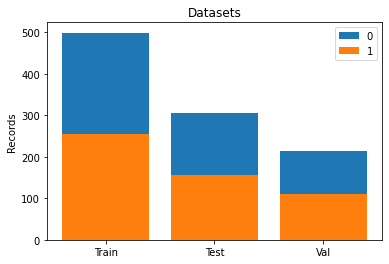

In [543]:
xn_train, xc_train, y_train, xn_test, xc_test, y_test, xn_val, xc_val, y_val = split_dataframe(
    dataset=normalized_investments_dataframe,
    test_size=0.3,
    val_size=0.1,
    random_state=5,
)

Input: (499, 13) (499, 8, 64)
Model: "model_85"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_183 (InputLayer)          [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense_431 (Dense)               (None, 4096)         57344       input_183[0][0]                  
__________________________________________________________________________________________________
dropout_302 (Dropout)           (None, 4096)         0           dense_431[0][0]                  
__________________________________________________________________________________________________
input_184 (InputLayer)          [(None, 8, 64)]      0                                            
_____________________________________________________________

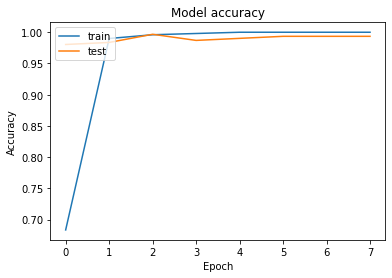

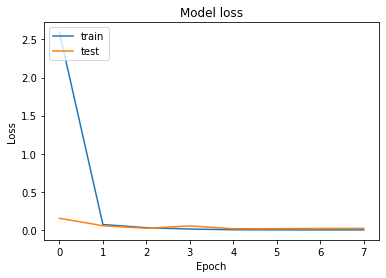

2/2 [==============================] - 0s 55ms/step - loss: 1.0590e-04 - binary_accuracy: 1.0000
Metrics: 0.00010589529847493395 1.0


In [544]:
investment_link_prediction, loss, accuracy = train_link_prediction(
    xn_train,
    xc_train,
    y_train,
    xn_test,
    xc_test,
    y_test,
    xn_val,
    xc_val,
    y_val,
    learning_rate=0.001,
    epochs=10,
    batch_size=100,
    dropout=0.01,
    patience=3,
    momentum=0.5,
    rho=0.9,
)

              precision    recall  f1-score   support

       False       0.99      1.00      0.99       150
        True       1.00      0.99      0.99       156

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.99       306



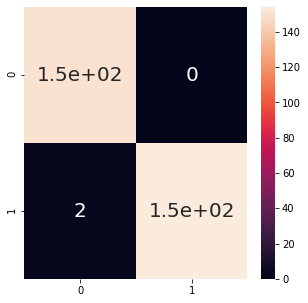

In [545]:
error_analysis(
    model=investment_link_prediction,
    confidence=0.9,
    xn_test=xn_test,
    xc_test=xc_test,
    y_test=y_test,
)

In [561]:
predictions: list = predict_link_model(
    model=investment_link_prediction,
    normalization=investments_normalization_parameters,
    confidence=0.99,
    records=[{
        'city#company': 'San Francisco',
        'state#company': 'California',
        'country#company': 'US',
        'industry#company': 'health',
        'employee_count#company': 100,
        'affiliations#company': 3000,
        'popularity_score#company': 0.9,
        'total_investments#company': 12,
        'valuation#company': 10000000,
        'average_investment_size#company': 10000,
        'city#person': 'San Francisco',
        'state#person': 'California',
        'country#person': 'US',
        'industry#person': 'health',
        'affiliations#person': 1000,
        'popularity_score#person': 0.4,
        'total_investments#person': 2,
        'average_investment_size#person': 2000,
        'introduction_path_length#relationship': 1,
        'introduction_path_score#relationship': 0.99,
        'mutual_connections#relationship': 300,
    }, {
        'city#company': 'San Francisco',
        'state#company': 'California',
        'country#company': 'US',
        'industry#company': 'health',
        'employee_count#company': 100,
        'affiliations#company': 3000,
        'popularity_score#company': 0.9,
        'total_investments#company': 2,
        'valuation#company': 10000,
        'average_investment_size#company': 50,
        'city#person': 'New York',
        'state#person': 'New York',
        'country#person': 'US',
        'industry#person': 'finance',
        'affiliations#person': 100,
        'popularity_score#person': 0.1,
        'total_investments#person': 2,
        'average_investment_size#person': 2000,
        'introduction_path_length#relationship': 6,
        'introduction_path_score#relationship': 0.04,
        'mutual_connections#relationship': 0,
    }, {
        'city#company': 'San Francisco',
        'state#company': 'California',
        'country#company': 'US',
        'industry#company': 'health',
        'employee_count#company': 100,
        'affiliations#company': 300000,
        'popularity_score#company': 0.9,
        'total_investments#company': 2,
        'valuation#company': 10000,
        'average_investment_size#company': 50,
        'city#person': 'New York',
        'state#person': 'New York',
        'country#person': 'US',
        'industry#person': 'finance',
        'affiliations#person': 100,
        'popularity_score#person': 0.1,
        'total_investments#person': 2,
        'average_investment_size#person': 2000,
        'introduction_path_length#relationship': 6,
        'introduction_path_score#relationship': 0.04,
        'mutual_connections#relationship': 0,
    }],
)
assert predictions[0][0]
assert not predictions[1][0]
assert predictions[2][0]

Vectorizing: city#company
Vectorizing: state#company
Vectorizing: country#company
Vectorizing: industry#company
Vectorizing: city#person
Vectorizing: state#person
Vectorizing: country#person
Vectorizing: industry#person
Numerical Features: ['employee_count#company', 'affiliations#company', 'popularity_score#company', 'total_investments#company', 'valuation#company', 'average_investment_size#company', 'affiliations#person', 'popularity_score#person', 'total_investments#person', 'average_investment_size#person', 'introduction_path_length#relationship', 'introduction_path_score#relationship', 'mutual_connections#relationship']
Categorical Features: ['city#company', 'state#company', 'country#company', 'industry#company', 'city#person', 'state#person', 'country#person', 'industry#person']
Input: (3, 13) (3, 8, 64)
Predictions: [[1.0000000e+00]
 [1.8751621e-04]
 [1.0000000e+00]]
Confidence: [[ True]
 [False]
 [ True]]


# Contact Prediction

Links: (1030, 20)


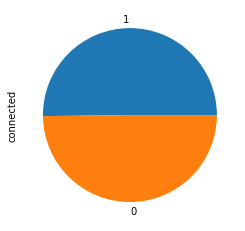

In [558]:
raw_contacts_dataframe: pd.DataFrame = generate_random_contacts_dataset(
    total=1000,
    connections=0.5,
    nulls=0.01,
    relevance=10,
    connectedness=0.5,
    similarity=0.5,
    closeness=0.5,
    capitalization=0.5,
    popularity=0.5,
    feedback=[
        {
            'city#1': 'San Francisco',
            'state#1': 'California',
            'country#1': 'US',
            'industry#1': 'health',
            'affiliations#1': 600,
            'popularity_score#1': 0.9,
            'total_investments#1': 10,
            'average_investment_size#1': 20000,
            'city#2': 'San Francisco',
            'state#2': 'California',
            'country#2': 'US',
            'industry#2': 'health',
            'affiliations#2': 1000,
            'popularity_score#2': 0.4,
            'total_investments#2': 2,
            'average_investment_size#2': 2000,
            'introduction_path_length#relationship': 2,
            'introduction_path_score#relationship': 0.95,
            'mutual_connections#relationship': 300,
            'connected': 1,
        },
        {
            'city#1': 'San Francisco',
            'state#1': 'California',
            'country#1': 'US',
            'industry#1': 'health',
            'affiliations#1': 30,
            'popularity_score#1': 0.01,
            'total_investments#1': 0,
            'average_investment_size#1': 0,
            'city#2': 'San Francisco',
            'state#2': 'California',
            'country#2': 'US',
            'industry#2': 'health',
            'affiliations#2': 1000,
            'popularity_score#2': 0.02,
            'total_investments#2': 2,
            'average_investment_size#2': 2000,
            'introduction_path_length#relationship': 6,
            'introduction_path_score#relationship': 0.04,
            'mutual_connections#relationship': 0,
            'connected': 0,
        },
    ],
)

In [548]:
raw_contacts_dataframe.head()

,city#1,state#1,country#1,industry#1,affiliations#1,popularity_score#1,total_investments#1,average_investment_size#1,city#2,state#2,country#2,industry#2,affiliations#2,popularity_score#2,total_investments#2,average_investment_size#2,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,Lutgambs,Luuu Elol,Ateosuai,lnelieoocl,1827,0.687043,3.0,79659.0,Moeiptmiop,Ngaa Acsae,,xaumeiureu,717,0.245011,1.0,43950.0,6,0.118987,10,0
1,Tislnoigm,Eiuatimegll,Uhcoy Rrrg,seusrtaeue,44109,0.955478,2.0,818158.0,Tislnoigm,Eiuatimegll,Uhcoy Rrrg,prauopppme,528,0.620579,0.0,215251.0,1,0.995806,9,1
2,Pjlopl Erl,Rtcgu Eit,Rhl Tolgin,selegsapao,20986,0.915348,2.0,900668.0,Aloel Lpotla,Rtcgu Eit,Rhl Tolgin,txeoargeom,18692,0.919200,4.0,807896.0,5,0.977953,4189,1
3,Poouisoceo,Hgeug Mmsg,Reai Epeexu,paenixrcpc,1688,0.764655,1.0,785701.0,Poouisoceo,Hgeug Mmsg,Reai Epeexu,tiarirucns,39013,0.982732,2.0,34788.0,1,0.179124,7,1
4,Lirnlgrc,Rmiuia Pgae,Csu Sntgya,zeuaupcrgt,1845,0.795657,1.0,44505.0,Urjot Mam,Ektuomuu,Ilomk Utrieg,araarereas,1091,0.786353,2.0,48463.0,5,0.095955,8,0


In [549]:
raw_contacts_dataframe: pd.DataFrame = fix_nulls(raw_contacts_dataframe)

In [550]:
raw_contacts_dataframe.head()

,city#1,state#1,country#1,industry#1,affiliations#1,popularity_score#1,total_investments#1,average_investment_size#1,city#2,state#2,country#2,industry#2,affiliations#2,popularity_score#2,total_investments#2,average_investment_size#2,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,Lutgambs,Luuu Elol,Ateosuai,lnelieoocl,1827,0.687043,3.0,79659.0,Moeiptmiop,Ngaa Acsae,,xaumeiureu,717,0.245011,1.0,43950.0,6,0.118987,10,0
1,Tislnoigm,Eiuatimegll,Uhcoy Rrrg,seusrtaeue,44109,0.955478,2.0,818158.0,Tislnoigm,Eiuatimegll,Uhcoy Rrrg,prauopppme,528,0.620579,0.0,215251.0,1,0.995806,9,1
2,Pjlopl Erl,Rtcgu Eit,Rhl Tolgin,selegsapao,20986,0.915348,2.0,900668.0,Aloel Lpotla,Rtcgu Eit,Rhl Tolgin,txeoargeom,18692,0.919200,4.0,807896.0,5,0.977953,4189,1
3,Poouisoceo,Hgeug Mmsg,Reai Epeexu,paenixrcpc,1688,0.764655,1.0,785701.0,Poouisoceo,Hgeug Mmsg,Reai Epeexu,tiarirucns,39013,0.982732,2.0,34788.0,1,0.179124,7,1
4,Lirnlgrc,Rmiuia Pgae,Csu Sntgya,zeuaupcrgt,1845,0.795657,1.0,44505.0,Urjot Mam,Ektuomuu,Ilomk Utrieg,araarereas,1091,0.786353,2.0,48463.0,5,0.095955,8,0


In [551]:
vectorized_contacts_dataframe: pd.DataFrame = df2vec(raw_contacts_dataframe)

Vectorizing: city#1
Vectorizing: state#1
Vectorizing: country#1
Vectorizing: industry#1
Vectorizing: city#2
Vectorizing: state#2
Vectorizing: country#2
Vectorizing: industry#2


In [552]:
vectorized_contacts_dataframe.head()

,city#1,state#1,country#1,industry#1,affiliations#1,popularity_score#1,total_investments#1,average_investment_size#1,city#2,state#2,country#2,industry#2,affiliations#2,popularity_score#2,total_investments#2,average_investment_size#2,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,"[51, 54, 54, 56, 102, 55, 48, 55, 52, 97, 51, ...","[50, 56, 48, 55, 53, 49, 51, 52, 52, 53, 49, 5...","[100, 99, 49, 98, 57, 50, 100, 54, 57, 100, 49...","[49, 52, 98, 98, 102, 57, 102, 98, 98, 55, 51,...",1827,0.687043,3.0,79659.0,"[50, 55, 101, 56, 50, 100, 56, 52, 51, 57, 100...","[100, 101, 98, 54, 50, 53, 102, 98, 54, 100, 9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[100, 57, 56, 52, 52, 51, 49, 98, 57, 102, 54,...",717,0.245011,1.0,43950.0,6,0.118987,10,0
1,"[56, 50, 50, 50, 99, 52, 101, 53, 48, 51, 102,...","[57, 51, 53, 52, 51, 48, 99, 48, 101, 55, 55, ...","[51, 102, 97, 51, 54, 49, 48, 102, 50, 49, 97,...","[53, 101, 56, 98, 102, 51, 51, 56, 97, 53, 55,...",44109,0.955478,2.0,818158.0,"[56, 50, 50, 50, 99, 52, 101, 53, 48, 51, 102,...","[57, 51, 53, 52, 51, 48, 99, 48, 101, 55, 55, ...","[51, 102, 97, 51, 54, 49, 48, 102, 50, 49, 97,...","[57, 55, 51, 48, 57, 48, 56, 48, 98, 57, 52, 1...",528,0.620579,0.0,215251.0,1,0.995806,9,1
2,"[51, 98, 97, 55, 97, 50, 99, 101, 102, 99, 101...","[51, 55, 57, 51, 53, 100, 100, 49, 101, 97, 51...","[100, 51, 56, 100, 55, 52, 54, 99, 100, 100, 1...","[53, 99, 55, 101, 53, 100, 49, 99, 56, 49, 100...",20986,0.915348,2.0,900668.0,"[100, 98, 50, 56, 57, 102, 57, 52, 50, 52, 98,...","[51, 55, 57, 51, 53, 100, 100, 49, 101, 97, 51...","[100, 51, 56, 100, 55, 52, 54, 99, 100, 100, 1...","[98, 99, 48, 55, 51, 97, 98, 49, 48, 57, 99, 4...",18692,0.919200,4.0,807896.0,5,0.977953,4189,1
3,"[56, 55, 51, 50, 50, 99, 50, 99, 102, 50, 55, ...","[54, 57, 53, 102, 49, 98, 52, 49, 97, 57, 101,...","[48, 48, 48, 55, 102, 57, 54, 50, 99, 51, 101,...","[53, 99, 100, 57, 57, 100, 56, 101, 52, 49, 99...",1688,0.764655,1.0,785701.0,"[56, 55, 51, 50, 50, 99, 50, 99, 102, 50, 55, ...","[54, 57, 53, 102, 49, 98, 52, 49, 97, 57, 101,...","[48, 48, 48, 55, 102, 57, 54, 50, 99, 51, 101,...","[102, 97, 49, 102, 52, 99, 100, 54, 54, 100, 1...",39013,0.982732,2.0,34788.0,1,0.179124,7,1
4,"[98, 99, 100, 99, 102, 102, 97, 51, 101, 53, 5...","[97, 51, 102, 53, 102, 52, 52, 57, 51, 51, 101...","[49, 102, 100, 48, 48, 54, 55, 48, 98, 55, 54,...","[101, 54, 53, 51, 57, 53, 57, 102, 55, 98, 54,...",1845,0.795657,1.0,44505.0,"[101, 55, 100, 54, 55, 102, 100, 48, 48, 102, ...","[48, 48, 56, 100, 50, 57, 101, 97, 49, 97, 54,...","[102, 55, 52, 53, 49, 50, 49, 52, 54, 99, 102,...","[97, 97, 53, 52, 57, 55, 99, 102, 102, 52, 56,...",1091,0.786353,2.0,48463.0,5,0.095955,8,0


In [553]:
normalized_contacts_dataframe, contacts_normalization_parameters = normalize(
    df=vectorized_contacts_dataframe
)
normalized_contacts_dataframe.head()

Normalizing: affiliations#1 Mean: 8022.556862745098 Std: 13296.048335067875
Normalizing: total_investments#1 Mean: 2.046078431372549 Std: 1.6207784490449664
Normalizing: average_investment_size#1 Mean: 189250.90588235293 Std: 264409.34345061495
Normalizing: affiliations#2 Mean: 8036.73431372549 Std: 12935.556088166715
Normalizing: total_investments#2 Mean: 2.049019607843137 Std: 1.4133629116151267
Normalizing: average_investment_size#2 Mean: 180170.63333333333 Std: 255035.0947540609
Normalizing: introduction_path_length#relationship Mean: 4.403921568627451 Std: 1.9801726497931196
Normalizing: mutual_connections#relationship Mean: 1275.394117647059 Std: 2581.275752770275


,city#1,state#1,country#1,industry#1,affiliations#1,popularity_score#1,total_investments#1,average_investment_size#1,city#2,state#2,country#2,industry#2,affiliations#2,popularity_score#2,total_investments#2,average_investment_size#2,introduction_path_length#relationship,introduction_path_score#relationship,mutual_connections#relationship,connected
0,"[51, 54, 54, 56, 102, 55, 48, 55, 52, 97, 51, ...","[50, 56, 48, 55, 53, 49, 51, 52, 52, 53, 49, 5...","[100, 99, 49, 98, 57, 50, 100, 54, 57, 100, 49...","[49, 52, 98, 98, 102, 57, 102, 98, 98, 55, 51,...",-0.465970,0.687043,0.588558,-0.414478,"[50, 55, 101, 56, 50, 100, 56, 52, 51, 57, 100...","[100, 101, 98, 54, 50, 53, 102, 98, 54, 100, 9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[100, 57, 56, 52, 52, 51, 49, 98, 57, 102, 54,...",-0.565862,0.245011,-0.742215,-0.534125,0.806030,0.118987,-0.490220,0
1,"[56, 50, 50, 50, 99, 52, 101, 53, 48, 51, 102,...","[57, 51, 53, 52, 51, 48, 99, 48, 101, 55, 55, ...","[51, 102, 97, 51, 54, 49, 48, 102, 50, 49, 97,...","[53, 101, 56, 98, 102, 51, 51, 56, 97, 53, 55,...",2.714073,0.955478,-0.028430,2.378536,"[56, 50, 50, 50, 99, 52, 101, 53, 48, 51, 102,...","[57, 51, 53, 52, 51, 48, 99, 48, 101, 55, 55, ...","[51, 102, 97, 51, 54, 49, 48, 102, 50, 49, 97,...","[57, 55, 51, 48, 57, 48, 56, 48, 98, 57, 52, 1...",-0.580472,0.620579,-1.449748,0.137551,-1.719002,0.995806,-0.490608,1
2,"[51, 98, 97, 55, 97, 50, 99, 101, 102, 99, 101...","[51, 55, 57, 51, 53, 100, 100, 49, 101, 97, 51...","[100, 51, 56, 100, 55, 52, 54, 99, 100, 100, 1...","[53, 99, 55, 101, 53, 100, 49, 99, 56, 49, 100...",0.974985,0.915348,-0.028430,2.690590,"[100, 98, 50, 56, 57, 102, 57, 52, 50, 52, 98,...","[51, 55, 57, 51, 53, 100, 100, 49, 101, 97, 51...","[100, 51, 56, 100, 55, 52, 54, 99, 100, 100, 1...","[98, 99, 48, 55, 51, 97, 98, 49, 48, 57, 99, 4...",0.823719,0.919200,1.380382,2.461329,0.301023,0.977953,1.128746,1
3,"[56, 55, 51, 50, 50, 99, 50, 99, 102, 50, 55, ...","[54, 57, 53, 102, 49, 98, 52, 49, 97, 57, 101,...","[48, 48, 48, 55, 102, 57, 54, 50, 99, 51, 101,...","[53, 99, 100, 57, 57, 100, 56, 101, 52, 49, 99...",-0.476424,0.764655,-0.645417,2.255783,"[56, 55, 51, 50, 50, 99, 50, 99, 102, 50, 55, ...","[54, 57, 53, 102, 49, 98, 52, 49, 97, 57, 101,...","[48, 48, 48, 55, 102, 57, 54, 50, 99, 51, 101,...","[102, 97, 49, 102, 52, 99, 100, 54, 54, 100, 1...",2.394661,0.982732,-0.034683,-0.570050,-1.719002,0.179124,-0.491383,1
4,"[98, 99, 100, 99, 102, 102, 97, 51, 101, 53, 5...","[97, 51, 102, 53, 102, 52, 52, 57, 51, 51, 101...","[49, 102, 100, 48, 48, 54, 55, 48, 98, 55, 54,...","[101, 54, 53, 51, 57, 53, 57, 102, 55, 98, 54,...",-0.464616,0.795657,-0.645417,-0.547431,"[101, 55, 100, 54, 55, 102, 100, 48, 48, 102, ...","[48, 48, 56, 100, 50, 57, 101, 97, 49, 97, 54,...","[102, 55, 52, 53, 49, 50, 49, 52, 54, 99, 102,...","[97, 97, 53, 52, 57, 55, 99, 102, 102, 52, 56,...",-0.536949,0.786353,-0.034683,-0.516429,0.301023,0.095955,-0.490995,0


Numerical Features: ['affiliations#1', 'popularity_score#1', 'total_investments#1', 'average_investment_size#1', 'affiliations#2', 'popularity_score#2', 'total_investments#2', 'average_investment_size#2', 'introduction_path_length#relationship', 'introduction_path_score#relationship', 'mutual_connections#relationship']
Categorical Features: ['city#1', 'state#1', 'country#1', 'industry#1', 'city#2', 'state#2', 'country#2', 'industry#2']
Predicted: connected
Xn (1020, 11)
Xc (1020, 8)
Y (1020,)
Train (652, 11) (652, 8) (652,)
Test (204, 11) (204, 8) (204,)
Val (164, 11) (164, 8) (164,)
Train (652, 11) (652, 8, 64) (652,)
Test (204, 11) (204, 8, 64) (204,)
Val (164, 11) (164, 8, 64) (164,)
Links: [336, 105, 84] [652, 204, 164]


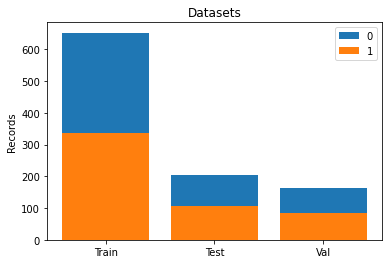

In [554]:
xn_train, xc_train, y_train, xn_test, xc_test, y_test, xn_val, xc_val, y_val = split_dataframe(
    dataset=normalized_contacts_dataframe,
    test_size=0.2,
    val_size=0.1
)

Input: (652, 11) (652, 8, 64)
Model: "model_86"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_185 (InputLayer)          [(None, 11)]         0                                            
__________________________________________________________________________________________________
dense_437 (Dense)               (None, 4096)         49152       input_185[0][0]                  
__________________________________________________________________________________________________
dropout_307 (Dropout)           (None, 4096)         0           dense_437[0][0]                  
__________________________________________________________________________________________________
input_186 (InputLayer)          [(None, 8, 64)]      0                                            
_____________________________________________________________

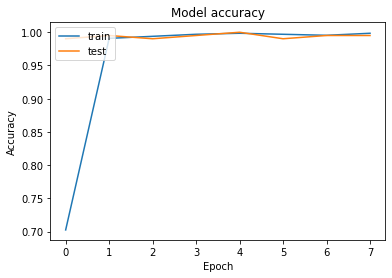

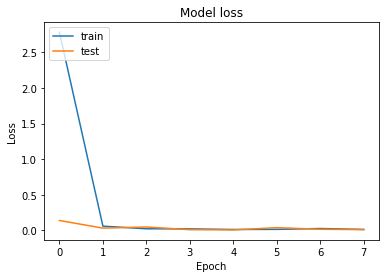

2/2 [==============================] - 0s 27ms/step - loss: 0.0163 - binary_accuracy: 0.9939
Metrics: 0.01629357412457466 0.9939024448394775


In [555]:
contact_link_prediction, loss, accuracy = train_link_prediction(
    xn_train,
    xc_train,
    y_train,
    xn_test,
    xc_test,
    y_test,
    xn_val,
    xc_val,
    y_val,
    learning_rate=0.001,
    epochs=10,
    batch_size=100,
    dropout=0.01,
    patience=3,
    momentum=0.5,
    rho=0.9,
)

              precision    recall  f1-score   support

       False       0.99      1.00      0.99        99
        True       1.00      0.99      1.00       105

    accuracy                           1.00       204
   macro avg       0.99      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



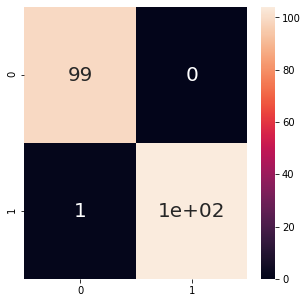

In [556]:
error_analysis(
    model=contact_link_prediction,
    confidence=0.9,
    xn_test=xn_test,
    xc_test=xc_test,
    y_test=y_test,
)

In [560]:
predictions: list = predict_link_model(
    model=contact_link_prediction, 
    normalization=contacts_normalization_parameters,
    confidence=0.99,
    records=[{
        'city#1': 'San Francisco',
        'state#1': 'California',
        'country#1': 'US',
        'industry#1': 'health',
        'affiliations#1': 600,
        'popularity_score#1': 0.9,
        'total_investments#1': 10,
        'average_investment_size#1': 20000,
        'city#2': 'San Francisco',
        'state#2': 'California',
        'country#2': 'US',
        'industry#2': 'health',
        'affiliations#2': 1000,
        'popularity_score#2': 0.4,
        'total_investments#2': 2,
        'average_investment_size#2': 2000,
        'introduction_path_length#relationship': 2,
        'introduction_path_score#relationship': 0.95,
        'mutual_connections#relationship': 300,
    }, {
        'city#1': 'San Francisco',
        'state#1': 'California',
        'country#1': 'US',
        'industry#1': 'health',
        'affiliations#1': 30,
        'popularity_score#1': 0.01,
        'total_investments#1': 0,
        'average_investment_size#1': 0,
        'city#2': 'San Francisco',
        'state#2': 'California',
        'country#2': 'US',
        'industry#2': 'health',
        'affiliations#2': 1000,
        'popularity_score#2': 0.02,
        'total_investments#2': 2,
        'average_investment_size#2': 2000,
        'introduction_path_length#relationship': 6,
        'introduction_path_score#relationship': 0.04,
        'mutual_connections#relationship': 0,
    }, {
        'city#1': 'San Francisco',
        'state#1': 'California',
        'country#1': 'US',
        'industry#1': 'health',
        'affiliations#1': 300000,
        'popularity_score#1': 0.75,
        'total_investments#1': 100000,
        'average_investment_size#1': 2000,
        'city#2': 'San Francisco',
        'state#2': 'California',
        'country#2': 'US',
        'industry#2': 'health',
        'affiliations#2': 1000,
        'popularity_score#2': 0.02,
        'total_investments#2': 2,
        'average_investment_size#2': 2000,
        'introduction_path_length#relationship': 6,
        'introduction_path_score#relationship': 0.04,
        'mutual_connections#relationship': 0,
    }],
)
assert predictions[0][0]
assert not predictions[1][0]
assert predictions[2][0]

Vectorizing: city#1
Vectorizing: state#1
Vectorizing: country#1
Vectorizing: industry#1
Vectorizing: city#2
Vectorizing: state#2
Vectorizing: country#2
Vectorizing: industry#2
Numerical Features: ['affiliations#1', 'popularity_score#1', 'total_investments#1', 'average_investment_size#1', 'affiliations#2', 'popularity_score#2', 'total_investments#2', 'average_investment_size#2', 'introduction_path_length#relationship', 'introduction_path_score#relationship', 'mutual_connections#relationship']
Categorical Features: ['city#1', 'state#1', 'country#1', 'industry#1', 'city#2', 'state#2', 'country#2', 'industry#2']
Input: (3, 11) (3, 8, 64)
Predictions: [[9.9999976e-01]
 [5.2163005e-04]
 [1.0000000e+00]]
Confidence: [[ True]
 [False]
 [ True]]
